In [101]:
import mglearn
import matplotlib.pyplot as plt
import os

In [102]:
os.getcwd()

'e:\\python'

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')

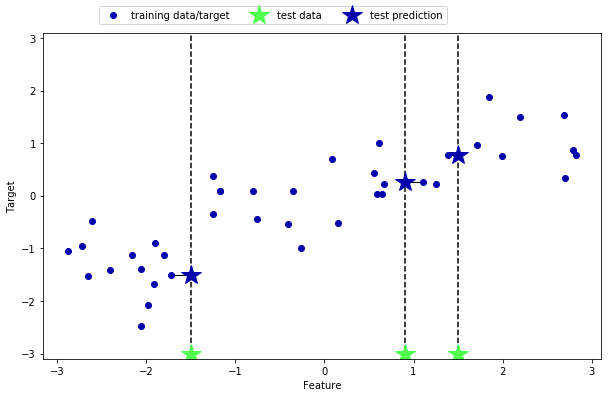

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

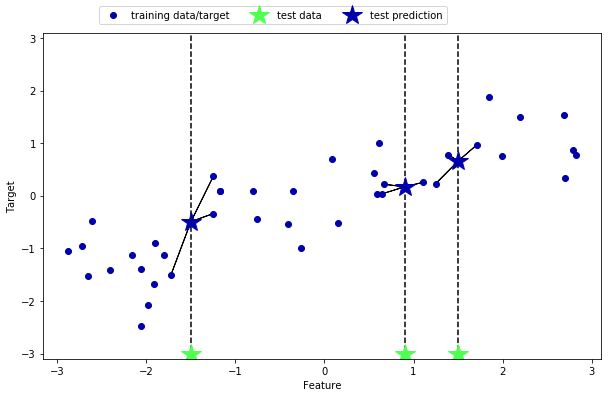

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=3) # 여러 개일 경우 mean 값

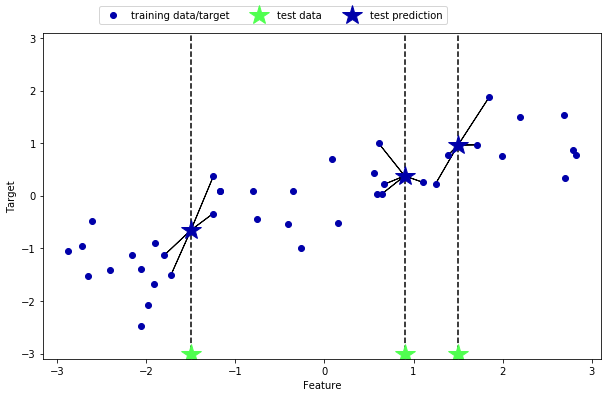

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=4)

In [6]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [7]:
cancer=load_breast_cancer()
print("키 값은 {}".format(cancer.keys()))
print("행열의 값 {}".format(cancer.data.shape))

키 값은 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
행열의 값 (569, 30)


In [42]:
# 특성이름(feature_name)
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print()
print("특성의 이름(feature_names) : {}".format(cancer['feature_names']))

클래스 이름(target_names) : ['malignant' 'benign']

특성의 이름(feature_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [43]:
from sklearn.model_selection import train_test_split

In [83]:
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               #stratity=cancer.target,
                                               random_state=77)

In [84]:
# y_train,y=test 개수
# y=train 안에 1과 0의 각각의 개수
# y_test 안에 1과 0의 각각의 개수
print(y_train.shape)
print(y_test.shape)

(426,)
(143,)


In [85]:
rate1=(426/(426+143))*100
rate2=(143/(426+143))*100
print(rate1,rate2)

74.86818980667839 25.13181019332162


In [86]:
y_train_0=(y_train==0).sum()
y_train_1=(y_train==1).sum()
y_test_0=(y_test==0).sum()
y_test_1=(y_test==1).sum()
print(y_train_0,y_train_1)
print(y_test_0,y_test_1)

158 268
54 89


In [87]:
rate1=(y_train_0/(y_train_0+y_test_0))*100
rate2=(y_test_0/(y_train_0+y_test_0))*100
print(rate1,rate2)

74.52830188679245 25.471698113207548


In [88]:
rate1=(y_train_1/(y_train_1+y_test_1))*100
rate2=(y_test_1/(y_train_1+y_test_1))*100
print(rate1,rate2)

75.07002801120449 24.92997198879552


In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
# 모델 선택, 학습, 예측
model=KNeighborsClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [91]:
# 정확도 구하기
((pred==y_test).sum()/len(pred))

0.9370629370629371

In [92]:
acc=[]
max_acc=0
for i in range(1,100):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    tmp_acc=(pred==y_test).sum()/len(pred) # 정확도 구하기
    
    acc.append(tmp_acc)
    
    if i%10==0:
        print(i,tmp_acc) # i가 10개 배수일 때마다 정확도를 보겠다
    
    # 비교(정확도 비교)-높은 정확도 나오면 변경
    if max_acc < tmp_acc:
        max_k=i         # 최고일 때 k 값
        max_acc=tmp_acc # 최고일 때 정확도
print(max_k,max_acc)

10 0.958041958041958
20 0.958041958041958
30 0.9440559440559441
40 0.9230769230769231
50 0.9230769230769231
60 0.9230769230769231
70 0.9230769230769231
80 0.9230769230769231
90 0.9230769230769231
7 0.958041958041958


In [93]:
import pandas as pd

In [100]:
dict_dat={"accuracy":acc}
dat=pd.DataFrame(dict_dat)
dat
dat.to_csv("acc_data.csv")